<a href="https://colab.research.google.com/github/NikolaObradovicJohnny/SciFi_Books_Recommendation_System/blob/main/%5BJUN_2023%5D_SciFi_Books_Recommendation_System_Deep_Neural_Network_Collaborative_Filtering_Top_100_Science_Fiction_Books_and_their_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Python libraries

# Data processing
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Model, Sequential
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.model_selection import train_test_split

# Visualization
import seaborn as sns

# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Mount Google Drive
from google.colab import drive

In [ ]:
# reviews

reviews = pd.read_csv("/content/drive/MyDrive/DS-Master studije/Programski jezici Data science/scifi_sorted/reviews/scifi_0-20.csv")

# take a look at the data
reviews.head(20)

,Unnamed: 0,book_title,date,rname,rating,review,likes,stars_given
0,0,Dune,"Mar 22, 2011",Rajat Ubhaykar,it was amazing,"In my head, the purpose of this review is very...",1130 likes,5.0
1,1,Dune,"Apr 29, 2014",Jay,did not like it,If this is the gold standard against which all...,1302 likes,1.0
2,2,Dune,"Nov 20, 2008",Manny,really liked it,There's a characteristically witty essay by Bo...,1890 likes,4.0
3,3,Dune,"Jun 24, 2007",John Wiswell,it was ok,No one should argue the importance Dune. It la...,1409 likes,2.0
4,4,Dune,"Nov 13, 2021",Lala BooksandLala,it was amazing,just when you thought 2021 couldn't get any we...,974 likes,5.0
5,5,Dune,"Jun 03, 2019",Emily (Books with Emily Fox),it was ok,Nope. Sorry I don't get it.I was able to finis...,917 likes,2.0
6,6,Dune,"Oct 08, 2021",Ayman,did not like it,60 pages in and then i DNFed. world building i...,773 likes,1.0
7,7,Dune,"Jun 02, 2015",Melissa ♥ Dog/Wolf Lover ♥ Martin,really liked it,LOOK DAMN IT! OMG!Mel 🖤🐶🐺🐾••••••••••••••••I wa...,590 likes,4.0
8,8,Dune,"Sep 27, 2021",Jack Edwards,it was ok,While the cultural impact of this book is indi...,584 likes,2.0
9,9,Dune,"Jul 18, 2011",Lyn,it was amazing,Dune.No other single syllable means as much to...,512 likes,5.0


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1800 non-null   int64  
 1   book_title   1800 non-null   object 
 2   date         1800 non-null   object 
 3   rname        1800 non-null   object 
 4   rating       1770 non-null   object 
 5   review       1800 non-null   object 
 6   likes        1799 non-null   object 
 7   stars_given  1770 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 112.6+ KB


In [ ]:
reviews_0_20 = pd.read_csv("/content/drive/MyDrive/DS-Master studije/Programski jezici Data science/scifi_sorted/reviews/scifi_0-20.csv")
reviews_20_40 = pd.read_csv("/content/drive/MyDrive/DS-Master studije/Programski jezici Data science/scifi_sorted/reviews/scifi_20-40.csv")
reviews_40_60 = pd.read_csv("/content/drive/MyDrive/DS-Master studije/Programski jezici Data science/scifi_sorted/reviews/scifi_40-60.csv")
reviews_60_80 = pd.read_csv("/content/drive/MyDrive/DS-Master studije/Programski jezici Data science/scifi_sorted/reviews/scifi_60-80.csv")
reviews_80_100 = pd.read_csv("/content/drive/MyDrive/DS-Master studije/Programski jezici Data science/scifi_sorted/reviews/scifi_80-100.csv")

frames = [reviews_0_20, reviews_20_40, reviews_40_60, reviews_60_80, reviews_80_100]


result = pd.concat(frames)

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 0 to 1799
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   9000 non-null   int64  
 1   book_title   9000 non-null   object 
 2   date         8998 non-null   object 
 3   rname        8998 non-null   object 
 4   rating       8855 non-null   object 
 5   review       8995 non-null   object 
 6   likes        8997 non-null   object 
 7   stars_given  8855 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 632.8+ KB


In [ ]:
# refactoring
start = 0
stop = 100
step = 20
dataframes = []

for data in range(start , stop, step):
  dataframes.append(pd.read_csv(f'/content/drive/MyDrive/DS-Master studije/Programski jezici Data science/scifi_sorted/reviews/scifi_{data}-{data+step}.csv'))

dataframes
all_reviews = pd.concat(dataframes)
df = all_reviews

In [ ]:
all_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 0 to 1799
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   9000 non-null   int64  
 1   book_title   9000 non-null   object 
 2   date         8998 non-null   object 
 3   rname        8998 non-null   object 
 4   rating       8855 non-null   object 
 5   review       8995 non-null   object 
 6   likes        8997 non-null   object 
 7   stars_given  8855 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 632.8+ KB


In [ ]:
all_reviews.head(2000)

,Unnamed: 0,book_title,date,rname,rating,review,likes,stars_given
0,0,Dune,"Mar 22, 2011",Rajat Ubhaykar,it was amazing,"In my head, the purpose of this review is very...",1130 likes,5.0
1,1,Dune,"Apr 29, 2014",Jay,did not like it,If this is the gold standard against which all...,1302 likes,1.0
2,2,Dune,"Nov 20, 2008",Manny,really liked it,There's a characteristically witty essay by Bo...,1890 likes,4.0
3,3,Dune,"Jun 24, 2007",John Wiswell,it was ok,No one should argue the importance Dune. It la...,1409 likes,2.0
4,4,Dune,"Nov 13, 2021",Lala BooksandLala,it was amazing,just when you thought 2021 couldn't get any we...,974 likes,5.0
...,...,...,...,...,...,...,...,...
195,195,Flowers for Algernon,"Sep 10, 2013",Candi,it was amazing,"""The walls between people are thin here, and i...",151 likes,5.0
196,196,Flowers for Algernon,"Nov 06, 2015",Bionic Jean,it was amazing,I first came across Flowers For Algernon as a ...,147 likes,5.0
197,197,Flowers for Algernon,"Apr 23, 2020",Baba,really liked it,SF Masterworks #25: Algernon is a mouse that u...,148 likes,4.0
198,198,Flowers for Algernon,"Feb 17, 2019",Nilufer Ozmekik,it was amazing,"I chose one of my favorite heart wrenching, po...",155 likes,5.0


In [ ]:
print(f'The unique reviwes dataset has {all_reviews["rname"].nunique()} unique reviewers.')
print(f'The unique reviwes dataset has {all_reviews["book_title"].nunique()} unique book titles.')
print(f'The unique reviwes dataset has {all_reviews["rating"].nunique()} unique ratings.')
print(f'The unique reviwes dataset has {all_reviews["likes"].nunique()} unique likes.')
print(f'The unique reviwes dataset has {all_reviews["stars_given"].nunique()} unique given stars.')

The unique reviwes dataset has 2866 unique reviewers.
The unique reviwes dataset has 100 unique book titles.
The unique reviwes dataset has 5 unique ratings.
The unique reviwes dataset has 541 unique likes.
The unique reviwes dataset has 5 unique given stars.


In [ ]:
all_reviews['rname'].nunique()

2866

In [ ]:
# summary

summary = pd.read_csv("/content/drive/MyDrive/DS-Master studije/Programski jezici Data science/scifi_sorted/summary/scifi_summary_20-40.csv")

# take a look at the data
summary.head(20)

# TODO: load all summaries and get count of books

,Unnamed: 0,title,author,ratings,language,pages
0,0,Frankenstein: The 1818 Text,Mary Wollstonecraft Shelley,"3.83 avg rating — 1,303,862 ratings",English,260 pages
1,1,"The Forever War (The Forever War, #1)",Joe Haldeman,"4.13 avg rating — 153,907 ratings",English,278 pages
2,2,Flowers for Algernon,Daniel Keyes,"4.16 avg rating — 541,930 ratings",English,216 pages
3,3,The Time Machine,H.G. Wells,"3.90 avg rating — 460,824 ratings",English,118 pages
4,4,"The Left Hand of Darkness (Hainish Cycle, #4)",Ursula K. Le Guin,"4.08 avg rating — 141,136 ratings",English,304 pages
5,5,"The Handmaid's Tale (The Handmaid's Tale, #1)",Margaret Atwood (Goodreads Author),"4.12 avg rating — 1,675,307 ratings",English,314 pages
6,6,"Rendezvous with Rama (Rama, #1)",Arthur C. Clarke,"4.11 avg rating — 146,501 ratings",English,243 pages
7,7,The War of the Worlds,H.G. Wells,"3.83 avg rating — 271,521 ratings",English,192 pages
8,8,"Jurassic Park (Jurassic Park, #1)",Michael Crichton,"4.06 avg rating — 859,323 ratings",English,416 pages
9,9,Snow Crash,Neal Stephenson (Goodreads Author),"4.02 avg rating — 253,310 ratings",English,559 pages


In [ ]:
num_users = all_reviews['rname'].nunique()
num_books = all_reviews['book_title'].nunique()

user_ids = df["rname"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
book_ids = df["book_title"].unique().tolist()
book2book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded2book = {i: x for i, x in enumerate(book_ids)}
df["user"] = df["rname"].map(user2user_encoded)
df["book"] = df["book_title"].map(book2book_encoded)

In [ ]:
book2book_encoded

{'Dune': 0,
 "Ender's Game": 1,
 "The Hitchhiker's Guide to the Galaxy": 2,
 '1984': 3,
 'Fahrenheit 451': 4,
 'Foundation': 5,
 'Brave New World': 6,
 'Hyperion': 7,
 'Do Androids Dream of Electric Sheep?': 8,
 'I, Robot': 9,
 '2001: A Space Odyssey': 10,
 'Slaughterhouse-Five': 11,
 'The Martian': 12,
 'Stranger in a Strange Land': 13,
 'The Foundation Trilogy': 14,
 'Ready Player One': 15,
 'The Hunger Games': 16,
 "Childhood's End": 17,
 'The Martian Chronicles': 18,
 'Neuromancer': 19,
 'Frankenstein: The 1818 Text': 20,
 'The Forever War': 21,
 'Flowers for Algernon': 22,
 'The Time Machine': 23,
 'The Left Hand of Darkness': 24,
 "The Handmaid's Tale": 25,
 'Rendezvous with Rama': 26,
 'The War of the Worlds': 27,
 'Jurassic Park': 28,
 'Snow Crash': 29,
 'Speaker for the Dead': 30,
 'Starship Troopers': 31,
 'The Moon Is a Harsh Mistress': 32,
 'A Canticle for Leibowitz': 33,
 "Old Man's War": 34,
 'A Clockwork Orange': 35,
 'A Wrinkle in Time': 36,
 'Animal Farm': 37,
 'The Di

In [ ]:
df.head()

,Unnamed: 0,book_title,date,rname,rating,review,likes,stars_given,user,book
0,0,Dune,"Mar 22, 2011",Rajat Ubhaykar,it was amazing,"In my head, the purpose of this review is very...",1130 likes,5.0,0,0
1,1,Dune,"Apr 29, 2014",Jay,did not like it,If this is the gold standard against which all...,1302 likes,1.0,1,0
2,2,Dune,"Nov 20, 2008",Manny,really liked it,There's a characteristically witty essay by Bo...,1890 likes,4.0,2,0
3,3,Dune,"Jun 24, 2007",John Wiswell,it was ok,No one should argue the importance Dune. It la...,1409 likes,2.0,3,0
4,4,Dune,"Nov 13, 2021",Lala BooksandLala,it was amazing,just when you thought 2021 couldn't get any we...,974 likes,5.0,4,0


In [ ]:
print('before dropna(): ',len(df))
# Drop row with NaN values
if len(df[df['stars_given'].isna()]) > 0:
  df = df.dropna()

print('after dropna(): ',len(df))

before dropna():  9000
after dropna():  8849


In [ ]:
num_users = len(user2user_encoded)
num_books = len(book2book_encoded)

# min and max ratings will be used to normalize the ratings later
min_stars_given = min(df['stars_given'])
max_stars_given = max(df['stars_given'])

print(
    "Number of users: {}, Number of Books: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_books, min_stars_given, max_stars_given
    )
)

Number of users: 2867, Number of Books: 100, Min rating: 1.0, Max rating: 5.0


In [ ]:
# Random Train-Test split

df = df.sample(frac=1, random_state=42) # randomly sample the data-set
x = df[["user", "book"]].values

# Normalize the targets between 0 and 1. Makes it easy to train.
y = df["stars_given"].apply(lambda x: (x - min_stars_given) / (max_stars_given - min_stars_given)).values

# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices],
)

In [ ]:
x_train.shape
# df
# y

(7964, 2)

In [ ]:
y_train.shape

(7964,)

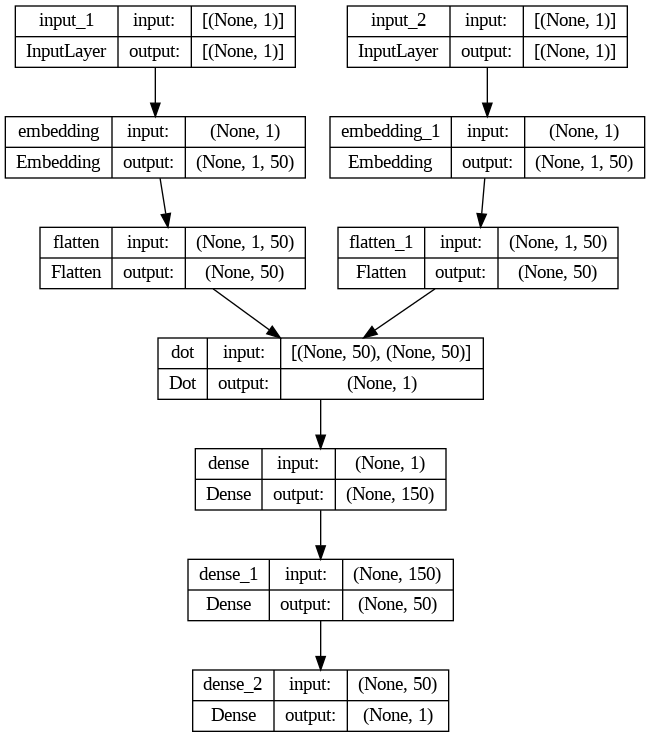

In [ ]:
# Define the model
embedding_size = 50

user_ips = layers.Input(shape=[1])
user_embedding = layers.Embedding(num_users, embedding_size, embeddings_initializer="he_normal", embeddings_regularizer=keras.regularizers.l2(1e-6))(user_ips)
# Embedding layer will create 610 vectors look-up table of 50 dimension each
user_vect = layers.Flatten()(user_embedding)

book_ips = layers.Input(shape=[1])
book_embedding = layers.Embedding(num_books, embedding_size, embeddings_initializer="he_normal", embeddings_regularizer=keras.regularizers.l2(1e-6))(book_ips)
book_vect = layers.Flatten()(book_embedding)

prod = layers.dot(inputs=[user_vect, book_vect],axes=1)

dense1 = layers.Dense(150, activation='relu', kernel_initializer="he_normal")(prod)
dense2 = layers.Dense(50, activation='relu', kernel_initializer="he_normal")(dense1)
dense3 = layers.Dense(1, activation='relu')(dense2)

model = Model([user_ips, book_ips], dense3)
model.compile(optimizer='adam', loss='mean_squared_error')

keras.utils.plot_model(model, show_shapes=True)

In [ ]:
history = model.fit([x_train[:,0], x_train[:,1]], y_train, batch_size=64, epochs=10, verbose=1)

# user_ips

Epoch 1/10
125/125 [==============================] - 3s 7ms/step - loss: 0.6083
Epoch 2/10
125/125 [==============================] - 0s 4ms/step - loss: 0.6082
Epoch 3/10
125/125 [==============================] - 0s 4ms/step - loss: 0.6081
Epoch 4/10
125/125 [==============================] - 0s 4ms/step - loss: 0.6081
Epoch 5/10
125/125 [==============================] - 0s 4ms/step - loss: 0.6081
Epoch 6/10
125/125 [==============================] - 0s 4ms/step - loss: 0.6081
Epoch 7/10
125/125 [==============================] - 0s 4ms/step - loss: 0.6081
Epoch 8/10
125/125 [==============================] - 0s 4ms/step - loss: 0.6081
Epoch 9/10
125/125 [==============================] - 0s 4ms/step - loss: 0.6081
Epoch 10/10
125/125 [==============================] - 0s 4ms/step - loss: 0.6081


In [ ]:
pred=model.predict([x_train[4:5,0], x_train[4:5,1]])
pred

1/1 [==============================] - 0s 109ms/step


array([[0.]], dtype=float32)

In [ ]:
# Reading the book file

all_books_df = df[['book','book_title']]
all_books_df = all_books_df.drop_duplicates()

all_books_df = all_books_df.sort_values(by=['book'])

In [ ]:
user_id = df.user.sample(20).iloc[0]
books_reviewed_by_user = df[df.user == user_id]
books_not_reviewed = all_books_df[~all_books_df["book"].isin(books_reviewed_by_user.book.values)]["book"]

books_not_reviewed

81       0
97       1
227      2
324      3
367      4
        ..
1415    95
1460    96
1594    97
1700    98
1774    99
Name: book, Length: 92, dtype: int64

In [ ]:
user_id

495

In [ ]:
books_reviewed_by_user.head(20)

,Unnamed: 0,book_title,date,rname,rating,review,likes,stars_given,user,book
1504,1504,A Wrinkle in Time,"Sep 11, 2007",Sidharth Vardhan,it was amazing,It was four-star stuff but the ending ruined i...,29 likes,5.0,495,36
770,770,Journey to the Center of the Earth,"Nov 21, 2019",Sidharth Vardhan,it was amazing,Didn't think it could be that good.Didn't thin...,11 likes,5.0,495,68
817,817,"I, Robot","Jul 22, 2014",Sidharth Vardhan,it was amazing,"""If one and a half chickens lay one and a half...",88 likes,5.0,495,9
769,769,Do Androids Dream of Electric Sheep?,"Jul 15, 2017",Sidharth Vardhan,it was amazing,Have you ever wondered how we are living in a ...,43 likes,5.0,495,8
920,920,2001: A Space Odyssey,"Sep 24, 2013",Sidharth Vardhan,really liked it,“They became farmers in the fields of stars; t...,48 likes,4.0,495,10
249,249,Never Let Me Go,"Jul 28, 2017",Sidharth Vardhan,it was amazing,The comparisons to the movie ‘The Island’ are ...,52 likes,5.0,495,62
211,211,Flowers for Algernon,"Jun 30, 2017",Sidharth Vardhan,it was amazing,On IntelligenceAre there any qualities that sh...,73 likes,5.0,495,22
1048,1048,Slaughterhouse-Five,"Jan 19, 2014",Sidharth Vardhan,really liked it,"“How nice -- to feel nothing, and still get fu...",53 likes,4.0,495,11


In [ ]:
books_not_reviewed_list = list(books_not_reviewed)
books_not_reviewed_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 63,
 64,
 65,
 66,
 67,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [ ]:
# create user book array

user_book_df = df[['user','book']][df['user'] == user_id]
user_book_df

,user,book
1504,495,36
770,495,68
817,495,9
769,495,8
920,495,10
249,495,62
211,495,22
1048,495,11


In [ ]:
user_book_array = user_book_df.to_numpy()
user_book_array

array([[495,  36],
       [495,  68],
       [495,   9],
       [495,   8],
       [495,  10],
       [495,  62],
       [495,  22],
       [495,  11]])

In [ ]:
ratings = model.predict([user_book_array[:,0], user_book_array[:,1]]).flatten()
ratings

1/1 [==============================] - 0s 24ms/step


array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
top_ratings_indices = ratings.argsort()[-10:][::-1] # indices of highest 10 ratings

In [ ]:
recommended_book_ids = [book_encoded2book.get(books_not_reviewed_list[x]) for x in top_ratings_indices]

In [ ]:
recommended_book_ids

#top_ratings_indices

['Hyperion',
 'Brave New World',
 'Foundation',
 'Fahrenheit 451',
 '1984',
 "The Hitchhiker's Guide to the Galaxy",
 "Ender's Game",
 'Dune']

In [ ]:
print("Showing recommendations for user: {}".format(user_id))
print("=====" * 9)
print("Books with high ratings from user")
print("-----" * 8)

for book in recommended_book_ids:
  print(book)

Showing recommendations for user: 495
Books with high ratings from user
----------------------------------------
Hyperion
Brave New World
Foundation
Fahrenheit 451
1984
The Hitchhiker's Guide to the Galaxy
Ender's Game
Dune


In [ ]:
# T H E   E N D